# Keras チュートリアル

https://yoohyooh.net/keras-tutorial/

CNNでmnist

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Activation, Flatten
from tensorflow.keras import utils

In [2]:
# MNISTを学習用に正規化する関数
def get_mnist(shape):
    # MNISTデータを読込む
    (x_train, t_train), (x_test, t_test) = mnist.load_data()

    # MNISTデータを3次元に成形する
    x_train = x_train.reshape(60000, shape[0], shape[1], shape[2])
    x_test = x_test.reshape(10000, shape[0], shape[1], shape[2])

    # 画像ピクセル数値を0~255 → 0.0~1.0に正規化
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    # one_hot_labelに変換
    t_train = utils.to_categorical(t_train, 10)
    t_test = utils.to_categorical(t_test, 10)

    return (x_train, t_train), (x_test, t_test)

In [3]:
# モデルを構築する関数
def create_model(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(3, 3)))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1024, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=1024, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(units=10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [4]:
# MNIST画像のサイズ形式
input_shape = (28, 28, 1)
# エポック数
epochs = 5
# ミニバッチ
batch_size = 512

In [5]:
# MNIST取得
(x_train, t_train), (x_test, t_test) = get_mnist(input_shape)

In [6]:
# モデル構築
model = create_model(input_shape)

In [7]:
# モデル要約出力
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

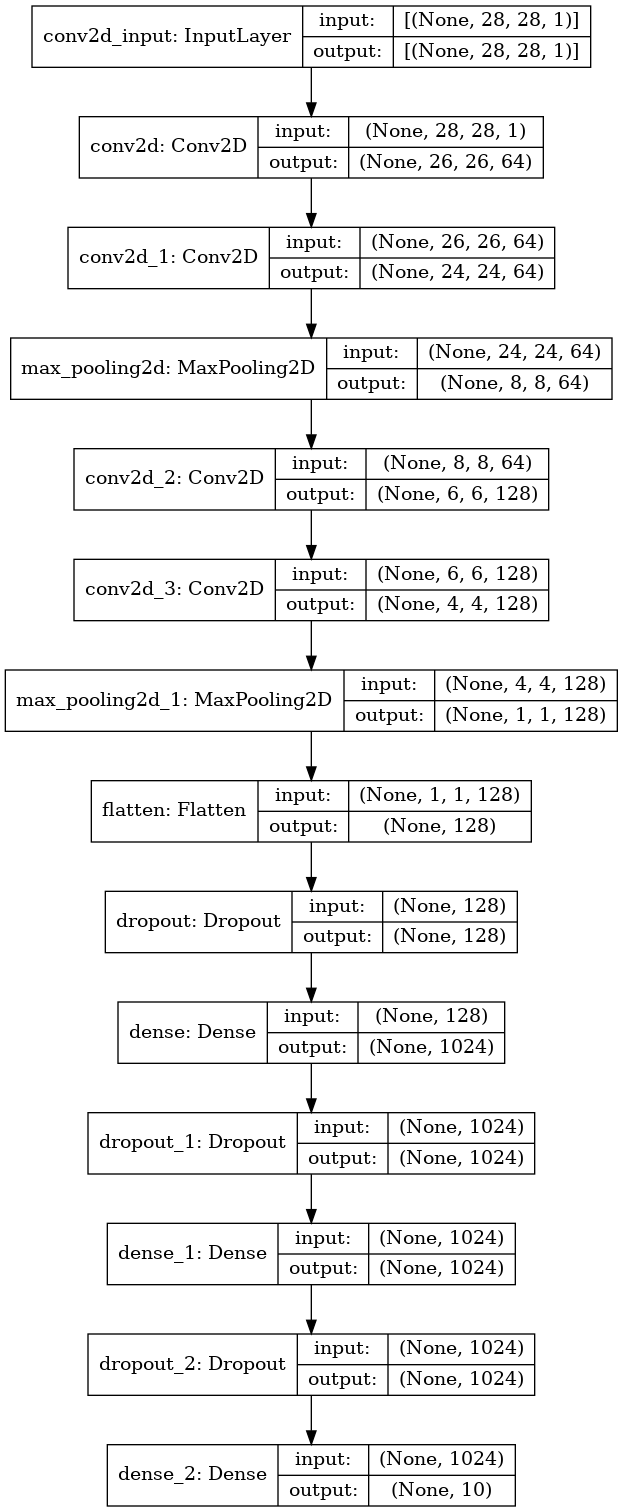

In [10]:
# より見やすいネットワークの可視化
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='./01_mnist_CNN_model.png', show_shapes=True)

In [9]:
# 訓練
hist = model.fit(x_train, t_train, batch_size=batch_size,
                    epochs=epochs, verbose=1, validation_split=0.16)

Epoch 1/5
99/99 [==============================] - 33s 330ms/step - loss: 1.0264 - accuracy: 0.6552 - val_loss: 0.0995 - val_accuracy: 0.9692
Epoch 2/5
99/99 [==============================] - 33s 330ms/step - loss: 0.1124 - accuracy: 0.9660 - val_loss: 0.0465 - val_accuracy: 0.9862
Epoch 3/5
99/99 [==============================] - 33s 330ms/step - loss: 0.0661 - accuracy: 0.9800 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 4/5
99/99 [==============================] - 33s 330ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 5/5
99/99 [==============================] - 33s 330ms/step - loss: 0.0409 - accuracy: 0.9861 - val_loss: 0.0365 - val_accuracy: 0.9894


In [11]:
# テスト
score = model.evaluate(x_test, t_test, verbose=1)

313/313 [==============================] - 2s 6ms/step - loss: 0.0358 - accuracy: 0.9890


In [12]:
# テスト結果
print('loss:', score[0])
print('accuracy:', score[1])

loss: 0.035757020115852356
accuracy: 0.9890000224113464


In [13]:
# loss関数の描画
import matplotlib.pyplot as plt
loss = hist.history['loss']
val_loss = hist.history['val_loss']

loss

[0.5037295818328857,
 0.09442245960235596,
 0.060096126049757004,
 0.0437077060341835,
 0.041081372648477554]

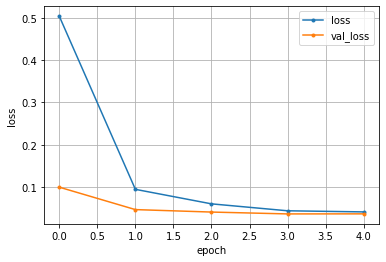

In [14]:
# lossのグラフ
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

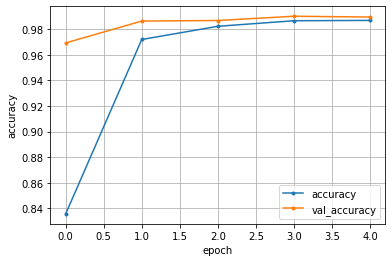

In [15]:
# 正解率の描画
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

# accuracyのグラフ
plt.plot(range(epochs), acc, marker='.', label='accuracy')
plt.plot(range(epochs), val_acc, marker='.', label='val_accuracy')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()